## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - California Dataset


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3         X4            Y
0  89.202588   222.703458  0.106488   1.321259    92.240508
1  37.922305  1659.117373  0.891033   9.138643  1478.944206
2  98.366464  1095.971308  0.604819  10.573433   670.085602
3  80.065503   925.489406  0.260552   7.730399   254.215543
4  76.111571  1398.005010  0.202844   2.039703   293.552488


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0276482	total: 58ms	remaining: 58s
1:	learn: 1.0140911	total: 58.6ms	remaining: 29.2s
2:	learn: 1.0038029	total: 59.1ms	remaining: 19.6s
3:	learn: 0.9903044	total: 59.6ms	remaining: 14.8s
4:	learn: 0.9770855	total: 60.2ms	remaining: 12s
5:	learn: 0.9653728	total: 60.9ms	remaining: 10.1s
6:	learn: 0.9521316	total: 61.6ms	remaining: 8.74s
7:	learn: 0.9392916	total: 62.1ms	remaining: 7.7s
8:	learn: 0.9261765	total: 62.4ms	remaining: 6.88s
9:	learn: 0.9135576	total: 63.1ms	remaining: 6.24s
10:	learn: 0.9033667	total: 63.6ms	remaining: 5.71s
11:	learn: 0.8910660	total: 64ms	remaining: 5.27s
12:	learn: 0.8795419	total: 64.3ms	remaining: 4.88s
13:	learn: 0.8673787	total: 64.8ms	remaining: 4.56s
14:	learn: 0.8568574	total: 65.3ms	remaining: 4.29s
15:	learn: 0.8468431	total: 66ms	remaining: 4.06s
16:	learn: 0.8358068	total: 66.7ms	remaining: 3.85s
17:	learn: 0.8254750	total: 67.1ms	remaining: 3.66s
18:	learn: 0.8174800	total: 67.6ms	remaining: 3.49s
19:

133:	learn: 0.2346013	total: 117ms	remaining: 759ms
134:	learn: 0.2324271	total: 118ms	remaining: 756ms
135:	learn: 0.2301132	total: 119ms	remaining: 754ms
136:	learn: 0.2285034	total: 119ms	remaining: 750ms
137:	learn: 0.2265928	total: 120ms	remaining: 747ms
138:	learn: 0.2246469	total: 120ms	remaining: 744ms
139:	learn: 0.2228322	total: 120ms	remaining: 740ms
140:	learn: 0.2212232	total: 121ms	remaining: 736ms
141:	learn: 0.2192698	total: 121ms	remaining: 733ms
142:	learn: 0.2168930	total: 122ms	remaining: 730ms
143:	learn: 0.2147538	total: 122ms	remaining: 727ms
144:	learn: 0.2123028	total: 123ms	remaining: 724ms
145:	learn: 0.2102395	total: 123ms	remaining: 720ms
146:	learn: 0.2080866	total: 124ms	remaining: 717ms
147:	learn: 0.2059954	total: 124ms	remaining: 713ms
148:	learn: 0.2036160	total: 124ms	remaining: 711ms
149:	learn: 0.2012998	total: 125ms	remaining: 707ms
150:	learn: 0.1996316	total: 125ms	remaining: 704ms
151:	learn: 0.1976964	total: 126ms	remaining: 701ms
152:	learn: 

288:	learn: 0.0653472	total: 185ms	remaining: 456ms
289:	learn: 0.0648972	total: 186ms	remaining: 455ms
290:	learn: 0.0644047	total: 186ms	remaining: 454ms
291:	learn: 0.0639895	total: 187ms	remaining: 453ms
292:	learn: 0.0636370	total: 187ms	remaining: 452ms
293:	learn: 0.0632443	total: 188ms	remaining: 451ms
294:	learn: 0.0628551	total: 188ms	remaining: 449ms
295:	learn: 0.0625254	total: 188ms	remaining: 448ms
296:	learn: 0.0621481	total: 189ms	remaining: 447ms
297:	learn: 0.0617772	total: 189ms	remaining: 446ms
298:	learn: 0.0614814	total: 190ms	remaining: 445ms
299:	learn: 0.0611749	total: 190ms	remaining: 444ms
300:	learn: 0.0608259	total: 191ms	remaining: 443ms
301:	learn: 0.0605151	total: 191ms	remaining: 442ms
302:	learn: 0.0601554	total: 192ms	remaining: 441ms
303:	learn: 0.0598004	total: 192ms	remaining: 440ms
304:	learn: 0.0594539	total: 192ms	remaining: 438ms
305:	learn: 0.0590774	total: 193ms	remaining: 437ms
306:	learn: 0.0587288	total: 193ms	remaining: 436ms
307:	learn: 

547:	learn: 0.0202501	total: 299ms	remaining: 247ms
548:	learn: 0.0201684	total: 300ms	remaining: 246ms
549:	learn: 0.0200644	total: 300ms	remaining: 245ms
550:	learn: 0.0200358	total: 300ms	remaining: 245ms
551:	learn: 0.0199563	total: 301ms	remaining: 244ms
552:	learn: 0.0198770	total: 301ms	remaining: 244ms
553:	learn: 0.0197791	total: 302ms	remaining: 243ms
554:	learn: 0.0196924	total: 302ms	remaining: 242ms
555:	learn: 0.0196192	total: 303ms	remaining: 242ms
556:	learn: 0.0195429	total: 303ms	remaining: 241ms
557:	learn: 0.0194588	total: 303ms	remaining: 240ms
558:	learn: 0.0193685	total: 304ms	remaining: 240ms
559:	learn: 0.0192747	total: 304ms	remaining: 239ms
560:	learn: 0.0192039	total: 304ms	remaining: 238ms
561:	learn: 0.0191189	total: 305ms	remaining: 238ms
562:	learn: 0.0190347	total: 305ms	remaining: 237ms
563:	learn: 0.0189476	total: 306ms	remaining: 236ms
564:	learn: 0.0188582	total: 306ms	remaining: 236ms
565:	learn: 0.0187896	total: 307ms	remaining: 235ms
566:	learn: 

708:	learn: 0.0124624	total: 367ms	remaining: 151ms
709:	learn: 0.0124525	total: 368ms	remaining: 150ms
710:	learn: 0.0124038	total: 368ms	remaining: 150ms
711:	learn: 0.0123944	total: 369ms	remaining: 149ms
712:	learn: 0.0123510	total: 369ms	remaining: 149ms
713:	learn: 0.0123138	total: 370ms	remaining: 148ms
714:	learn: 0.0123007	total: 370ms	remaining: 148ms
715:	learn: 0.0122915	total: 371ms	remaining: 147ms
716:	learn: 0.0122439	total: 371ms	remaining: 146ms
717:	learn: 0.0122335	total: 371ms	remaining: 146ms
718:	learn: 0.0121850	total: 372ms	remaining: 145ms
719:	learn: 0.0121747	total: 372ms	remaining: 145ms
720:	learn: 0.0121385	total: 373ms	remaining: 144ms
721:	learn: 0.0121297	total: 373ms	remaining: 144ms
722:	learn: 0.0120943	total: 374ms	remaining: 143ms
723:	learn: 0.0120844	total: 374ms	remaining: 143ms
724:	learn: 0.0120758	total: 375ms	remaining: 142ms
725:	learn: 0.0120372	total: 375ms	remaining: 142ms
726:	learn: 0.0120248	total: 376ms	remaining: 141ms
727:	learn: 

967:	learn: 0.0057837	total: 481ms	remaining: 15.9ms
968:	learn: 0.0057642	total: 482ms	remaining: 15.4ms
969:	learn: 0.0057395	total: 482ms	remaining: 14.9ms
970:	learn: 0.0057233	total: 483ms	remaining: 14.4ms
971:	learn: 0.0057102	total: 483ms	remaining: 13.9ms
972:	learn: 0.0056864	total: 484ms	remaining: 13.4ms
973:	learn: 0.0056642	total: 484ms	remaining: 12.9ms
974:	learn: 0.0056455	total: 484ms	remaining: 12.4ms
975:	learn: 0.0056299	total: 485ms	remaining: 11.9ms
976:	learn: 0.0056120	total: 485ms	remaining: 11.4ms
977:	learn: 0.0055944	total: 486ms	remaining: 10.9ms
978:	learn: 0.0055738	total: 486ms	remaining: 10.4ms
979:	learn: 0.0055612	total: 487ms	remaining: 9.93ms
980:	learn: 0.0055396	total: 487ms	remaining: 9.44ms
981:	learn: 0.0055163	total: 488ms	remaining: 8.94ms
982:	learn: 0.0054953	total: 488ms	remaining: 8.44ms
983:	learn: 0.0054829	total: 489ms	remaining: 7.94ms
984:	learn: 0.0054602	total: 489ms	remaining: 7.45ms
985:	learn: 0.0054423	total: 490ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC - GAN Model with skip connection

In [11]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


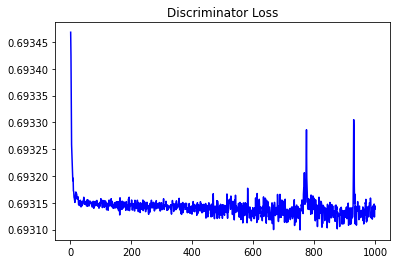

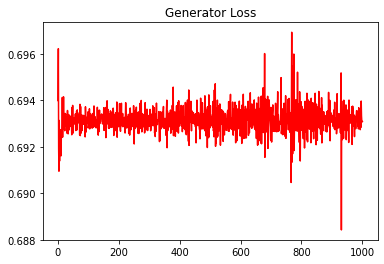

In [12]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.01653226128631337


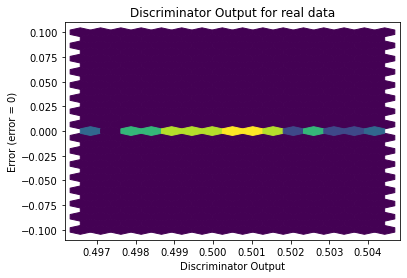

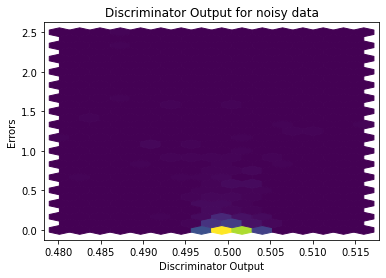

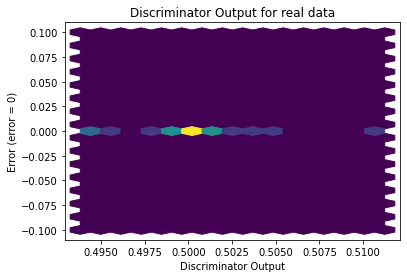

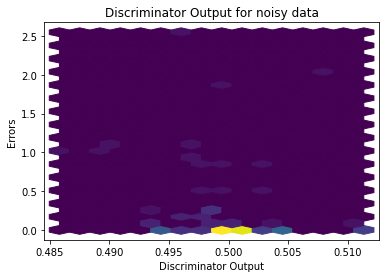

In [14]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [15]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
